In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [4]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [5]:
train=pd.read_csv("/content/sign_mnist_train.csv")
test=pd.read_csv("/content/sign_mnist_test.csv")

In [6]:
X_train=train.iloc[:,1:].values
X_test=test.iloc[:,1:].values
y_train=train.iloc[:,0].values
y_test=test.iloc[:,0].values

In [ ]:
y_train

array([ 3,  6,  2, ..., 18, 17, 23])

In [ ]:
X_train=X_train.reshape(-1,28,28,1).astype("float32")
X_test=X_test.reshape(-1,28,28,1).astype("float32")

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

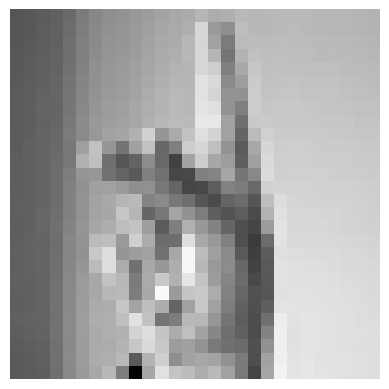

In [26]:
plt.imshow(X_test[2].squeeze(), cmap='gray', vmin=0, vmax=1, interpolation='nearest')
plt.axis('off')

In [9]:
y_train=to_categorical(y_train,26)
y_test=to_categorical(y_test,26)

In [10]:
X_train = X_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

In [11]:
data_gen=ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, zoom_range=0.2, horizontal_flip=False)

In [12]:
data_gen.fit(X_train)

In [ ]:
model=Sequential([
    Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(128,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(26, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(
    data_gen.flow(X_train, y_train,batch_size=64),
    validation_data=(X_test, y_test),
    epochs=20,
    steps_per_epoch=len(X_train)//64
    )

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


428/428 ━━━━━━━━━━━━━━━━━━━━ 35s 76ms/step - accuracy: 0.1204 - loss: 2.9122 - val_accuracy: 0.5807 - val_loss: 1.4287
Epoch 2/20
  1/428 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - accuracy: 0.4531 - loss: 1.7498

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


428/428 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4531 - loss: 1.7498 - val_accuracy: 0.5859 - val_loss: 1.4257
Epoch 3/20
428/428 ━━━━━━━━━━━━━━━━━━━━ 39s 76ms/step - accuracy: 0.4769 - loss: 1.5656 - val_accuracy: 0.7280 - val_loss: 0.7460
Epoch 4/20
428/428 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5781 - loss: 1.0919 - val_accuracy: 0.7328 - val_loss: 0.7427
Epoch 5/20
428/428 ━━━━━━━━━━━━━━━━━━━━ 37s 74ms/step - accuracy: 0.6409 - loss: 1.0567 - val_accuracy: 0.8250 - val_loss: 0.5321
Epoch 6/20
428/428 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6250 - loss: 0.9690 - val_accuracy: 0.8331 - val_loss: 0.5114
Epoch 7/20
428/428 ━━━━━━━━━━━━━━━━━━━━ 32s 74ms/step - accuracy: 0.7185 - loss: 0.8271 - val_accuracy: 0.8652 - val_loss: 0.3942
Epoch 8/20
428/428 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7969 - loss: 0.5125 - val_accuracy: 0.8585 - val_loss: 0.4091
Epoch 9/20
428/428 ━━━━━━━━━━━━━━━━━━━━ 37s 72ms/step - accuracy: 0.7694 - loss: 0.6596 - val_accuracy: 0.894

In [ ]:
model.save("sign_mnist_model.keras")

In [7]:
import tensorflow as tf

In [8]:
model = tf.keras.models.load_model('/content/sign_mnist_model.keras')

In [13]:
X_test[0].shape

(28, 28, 1)

In [27]:
single_image_input = X_test[2:3]

prediction = model.predict(single_image_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [28]:
print(prediction)

[[7.5112354e-14 1.1747409e-10 9.7333102e-20 1.0229694e-10 5.9112926e-16
  2.6098096e-13 9.3771371e-17 2.6018209e-18 3.0038121e-11 2.0609427e-19
  9.9980360e-01 1.2788400e-06 5.1788090e-15 7.2553581e-09 4.9037033e-15
  1.2665455e-09 2.7092791e-16 1.8942852e-04 9.6060875e-09 4.9885883e-15
  2.8905629e-07 2.9211531e-06 6.9339379e-08 6.8577624e-14 2.4357062e-06
  5.9343262e-20]]


In [29]:
print(np.argmax(prediction))

10


In [30]:
def get_letter(predicted_class):
  label_map = {i: chr(65 + i) for i in range(26)}
  predicted_letter = label_map[predicted_class]
  return predicted_letter

In [32]:
pred=get_letter(predicted_class=np.argmax(prediction))
pred

'K'